  Gender  Age  Salary  Purchase Iphone
0   Male   19   19000                0
1   Male   35   20000                0
(400, 10)
(400,)
[[ 1.63343153  0.30263547  0.63423354 ...  1.28173128 -0.13310971
   0.32876241]
 [-0.6414816   0.80040953 -1.72009838 ... -1.99915144 -0.93108162
   0.70830385]
 [ 0.79348872  1.30434024 -1.11357584 ... -1.49006934 -0.43145655
   1.12670514]
 ...
 [ 0.3074067   0.86047349 -0.48096027 ... -1.47091207  0.53740487
   0.28257995]
 [-1.01668313 -0.03930729  0.05206325 ... -1.40608235  1.31114712
   1.43136678]
 [ 0.49822175  1.58054069  2.0582508  ...  1.28195271  2.0853268
  -1.25757786]]
Training the model
Logistic
0.9854797979797979
Decision_Tree
0.8737373737373737


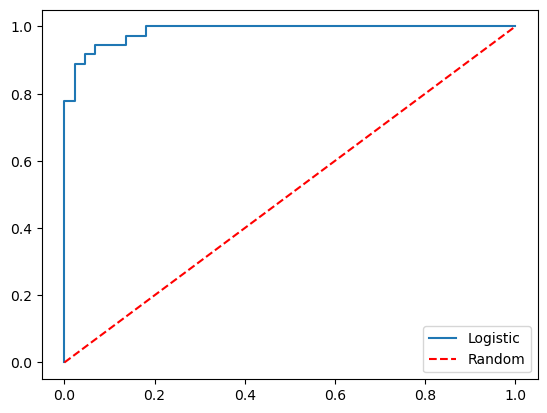

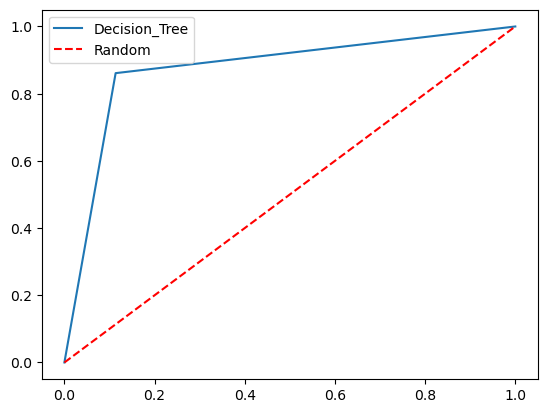

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc

# load dataset
data = pd.read_csv("C:/Users/grish/Downloads/iphone_purchase_records.csv")
print(data.head(2))

# Generate Synthetic Data-
X,y = make_classification(n_samples=400,n_features=10,n_classes=2,random_state=42)
print(X.shape)
print(y.shape)
print(X)

# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

# Train the Decision Tree model
decisiontree_model = DecisionTreeClassifier(criterion= 'entropy',random_state=123)
decisiontree_model.fit(X_train,y_train)
print("Training the model")

# Make Predictions on the test set
y_pred_ds = decisiontree_model.predict(X_test)

# Evaluate the model
confusion_matrix(y_test,y_pred_ds)
accuracy_score(y_test,y_pred_ds)

#y_pred_logistic = logistic_model.predict_proba(X_test)[:,1]
y_pred_ds = decisiontree_model.predict_proba(X_test)[:,1]

# Creating a DataFrame
test_df = pd.DataFrame({'Actual': y_test, 'Logistic':y_pred_logistic, 'Decision_Tree':y_pred_ds})
test_df

for model in ['Logistic','Decision_Tree']:
    fpr,tpr,thresh = roc_curve(test_df['Actual'],test_df[model])
    roc_auc = auc(fpr,tpr)
    print(model)
    print(roc_auc)

for model in ['Logistic','Decision_Tree']:
    fpr,tpr,_= roc_curve(test_df['Actual'],test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr, label = f'{model}')
    plt.plot([0,1],[0,1],'r--',label = 'Random')
    plt.legend()
    plt.show()

